In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [125]:
X,Y=make_blobs(n_features=2,centers=2,random_state=6,n_samples=500)

In [126]:
print(X.shape,Y.shape)

(500, 2) (500,)


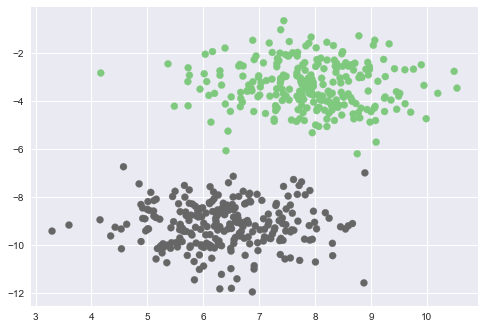

In [127]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

# Model and Helper Function

In [128]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [129]:
sigmoid(5)

0.9933071490757153

# Implement Perceptron Learning Algorithm
- Learning the Weights
- Learning the Loss
- Make the Prediction

In [130]:
def predict(X,W):
    return sigmoid(np.dot(X,W))

def loss(X,Y,W):
    
    Y_=predict(X,W)
    cost=np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,W,learning_rate):
    Y_=predict(X,W)
    dw=np.dot(X.T,(Y_-Y))
    m=X.shape[0]
    W=W-learning_rate*dw/(float(m))
    
    return W

def train(X,Y,learning_rate=0.1,max_epochs=500):
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    
    W=np.zeros(X.shape[1])
    
    for epochs in range(max_epochs):
        W=update(X,Y,W,learning_rate)
        
        if epochs%10==0:
            l=loss(X,Y,W)
            print("epochs %d Loss %0.4f"%(epochs,l))
            
    return W
    

In [131]:
weights=train(X,Y)

epochs 0 Loss 0.5430
epochs 10 Loss 0.1586
epochs 20 Loss 0.1014
epochs 30 Loss 0.0775
epochs 40 Loss 0.0642
epochs 50 Loss 0.0556
epochs 60 Loss 0.0495
epochs 70 Loss 0.0450
epochs 80 Loss 0.0415
epochs 90 Loss 0.0387
epochs 100 Loss 0.0364
epochs 110 Loss 0.0345
epochs 120 Loss 0.0328
epochs 130 Loss 0.0314
epochs 140 Loss 0.0302
epochs 150 Loss 0.0291
epochs 160 Loss 0.0281
epochs 170 Loss 0.0272
epochs 180 Loss 0.0265
epochs 190 Loss 0.0257
epochs 200 Loss 0.0251
epochs 210 Loss 0.0245
epochs 220 Loss 0.0240
epochs 230 Loss 0.0235
epochs 240 Loss 0.0230
epochs 250 Loss 0.0226
epochs 260 Loss 0.0222
epochs 270 Loss 0.0218
epochs 280 Loss 0.0215
epochs 290 Loss 0.0211
epochs 300 Loss 0.0208
epochs 310 Loss 0.0205
epochs 320 Loss 0.0203
epochs 330 Loss 0.0200
epochs 340 Loss 0.0198
epochs 350 Loss 0.0195
epochs 360 Loss 0.0193
epochs 370 Loss 0.0191
epochs 380 Loss 0.0189
epochs 390 Loss 0.0187
epochs 400 Loss 0.0185
epochs 410 Loss 0.0183
epochs 420 Loss 0.0182
epochs 430 Loss 0.0180

In [132]:
print(weights)

[-0.23088358 -1.56464286 -1.85579685]


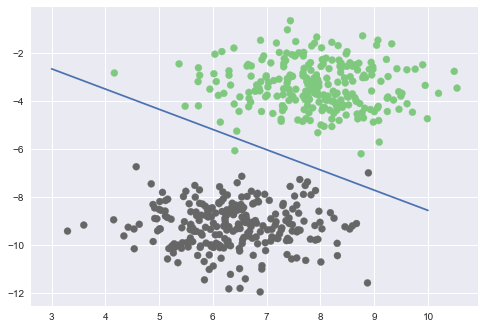

In [133]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
x=np.linspace(3,10,15)
y=-1*(weights[0]+weights[1]*x)/weights[2]
plt.plot(x,y)
plt.show()

# Perceptron Implementation -II
- Make Prediction
- Visualize Decision Surface
- Linear vs Non-Linear Classification

In [134]:
def get_prediction(X_test,weights,labels=True):
    if X_test.shape[1]!= weights.shape[0]:
        ones=np.ones((X_test.shape[0],1))
        X_test=np.hstack((ones,X_test))
        
    probs=predict(X_test,weights)
    if not labels:
        return probs
    else:
        labels=np.zeros(probs.shape)
        labels[probs>0.5]=1
        return labels    
    

In [135]:
Y_=get_prediction(X,weights,labels=True)

In [136]:
training_acc=np.mean(Y_==Y)

In [137]:
print(training_acc)

0.996


In [138]:
from sklearn.datasets import make_moons

In [141]:
X,Y=make_moons(n_samples=500,shuffle=True,noise=0.2,random_state=1)

In [143]:
print(X.shape)

(500, 2)


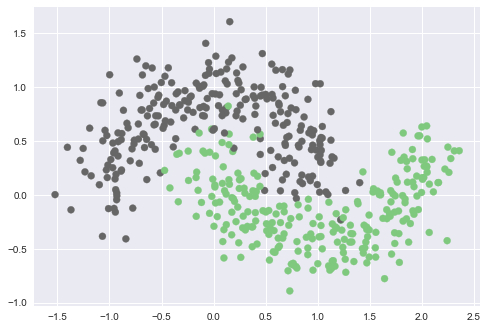

In [145]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent_r)

In [146]:
weights=train(X,Y)

epochs 0 Loss 0.6833
epochs 10 Loss 0.6044
epochs 20 Loss 0.5499
epochs 30 Loss 0.5104
epochs 40 Loss 0.4807
epochs 50 Loss 0.4575
epochs 60 Loss 0.4390
epochs 70 Loss 0.4239
epochs 80 Loss 0.4113
epochs 90 Loss 0.4007
epochs 100 Loss 0.3915
epochs 110 Loss 0.3836
epochs 120 Loss 0.3767
epochs 130 Loss 0.3706
epochs 140 Loss 0.3651
epochs 150 Loss 0.3602
epochs 160 Loss 0.3558
epochs 170 Loss 0.3517
epochs 180 Loss 0.3480
epochs 190 Loss 0.3446
epochs 200 Loss 0.3415
epochs 210 Loss 0.3386
epochs 220 Loss 0.3359
epochs 230 Loss 0.3334
epochs 240 Loss 0.3310
epochs 250 Loss 0.3288
epochs 260 Loss 0.3267
epochs 270 Loss 0.3248
epochs 280 Loss 0.3229
epochs 290 Loss 0.3211
epochs 300 Loss 0.3195
epochs 310 Loss 0.3179
epochs 320 Loss 0.3164
epochs 330 Loss 0.3150
epochs 340 Loss 0.3136
epochs 350 Loss 0.3123
epochs 360 Loss 0.3111
epochs 370 Loss 0.3099
epochs 380 Loss 0.3087
epochs 390 Loss 0.3076
epochs 400 Loss 0.3066
epochs 410 Loss 0.3056
epochs 420 Loss 0.3046
epochs 430 Loss 0.3037

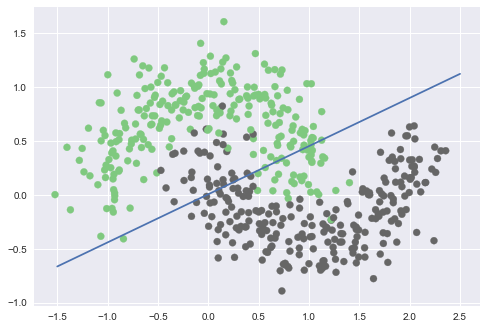

In [148]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
x=np.linspace(-1.5,2.5,15)
y=-1*(weights[0]+weights[1]*x)/weights[2]
plt.plot(x,y)
plt.show()